<h1>Telecom Customer Churn Prediction and Analysis</h1>

# Goals of the notebook
- Predict customer churn for a telecom company.
- Identify key drivers of customer churn.
- Make recommendations for customer retention.

<h1>Step 1: Setting Up the Notebook</h1>
First, we need to import the necessary Python libraries that we'll use throughout our analysis. We'll also load the dataset to begin exploring the data.

In [1]:
# Importing essential libraries for data manipulation, visualization, and modeling
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For more aesthetic visualizations
import warnings  # To handle warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
data_path = 'telecom_churn_data.csv'  #data path
churn_data = pd.read_csv(data_path)

# Display the first few rows to understand the dataset structure
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


<h1>Step 2: Initial Data Understanding & Summary</h1>
Let us begin by understanding the structure of our data which includes understanding what columns we have, their data types, and if there are any missing values.

In [2]:
# Overview of the dataset
churn_data.info()

# Checking for missing values in the dataset
missing_values_summary = churn_data.isnull().sum()

# Display columns with missing values, if any
missing_values_summary[missing_values_summary > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_7      601
last_date_of_month_8     1100
                        ...  
night_pck_user_9        74077
fb_user_6               74846
fb_user_7               74428
fb_user_8               73660
fb_user_9               74077
Length: 166, dtype: int64

<h1>Step 3: Data Cleaning and Preparation</h1>
We will now handle missing values in our dataset. The strategy to handle missing values will be by either filling with 0 (where it implies no activity) or imputing with median values (for revenue-related metrics).

In [3]:
# Columns with missing values that represent usage metrics (e.g., recharge count, data usage)
# Imputing missing values with 0 where missing data implies no activity
columns_to_fill_with_zero = [
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
    'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'
]

churn_data[columns_to_fill_with_zero] = churn_data[columns_to_fill_with_zero].fillna(0)

# For revenue metrics or important numeric features, we will impute using median values
columns_to_impute_with_median = [
    'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'
]

for column in columns_to_impute_with_median:
    churn_data[column].fillna(churn_data[column].median(), inplace=True)

# Verify if there are any remaining missing values
remaining_missing_values = churn_data.isnull().sum()
remaining_missing_values[remaining_missing_values > 0]

loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_date_of_month_8         1100
                            ...  
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
Length: 130, dtype: int64

<h1>Step 4: Identifying High-Value Customers</h1>
Next, we will filter our dataset to focus on high-value customers. High-value customers are those whose average recharge amount in the first two months (June and July) is above the 70th percentile.

In [4]:
# Calculate the average recharge amount for the first two months (June and July)
churn_data['avg_rech_amt_6_7'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']) / 2

# Define high-value customers as those above the 70th percentile of average recharge amount
percentile_70_value = churn_data['avg_rech_amt_6_7'].quantile(0.70)
high_value_customers = churn_data[churn_data['avg_rech_amt_6_7'] >= percentile_70_value]

# Display the number of high-value customers
high_value_customers.shape

(30011, 227)

<h1>Step 5: Tagging Churn Customers</h1>
Now, we will define our target variable (churn). A customer is considered to have churned if they have not made any calls (incoming or outgoing) and have not used mobile internet in the last month (September). We will also remove the churn-phase attributes to prevent data leakage.

In [5]:
# Tagging churned customers based on the churn phase (September)
# Churn criteria: No incoming calls, no outgoing calls, and no mobile internet usage in month 9
high_value_customers['churn'] = high_value_customers.apply(
    lambda row: 1 if (
        row['total_ic_mou_9'] == 0 and
        row['total_og_mou_9'] == 0 and
        row['vol_2g_mb_9'] == 0 and
        row['vol_3g_mb_9'] == 0
    ) else 0, axis=1
)

# Remove all the attributes corresponding to the churn phase
columns_to_remove = [col for col in high_value_customers.columns if '_9' in col]
high_value_customers_cleaned = high_value_customers.drop(columns=columns_to_remove)

# Check the updated dataset
high_value_customers_cleaned.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,0.0,0.0,0.0,667,0.00,0.00,0.00,0.0,408.0,0


<h1>Step 6: Exploratory Data Analysis (EDA)</h1>
The purpose of this step is to explore the characteristics of churned vs non-churned customers visually. This will help us understand key differences and potentially important features that might be useful in predicting churn.

<h2>Step 6.1:Exploratory Data Analysis (EDA) Overview</h2>
In this section, we will conduct Exploratory Data Analysis (EDA) to better understand customer behavior, especially focusing on comparing churned and non-churned customers. This will help us gain insights into patterns that might indicate reasons for churn.

<h2>Step 6.2: Count of Churned vs Non-Churned Customers</h2>
Let’s start by visualizing the count of churned vs non-churned customers to understand the class imbalance.

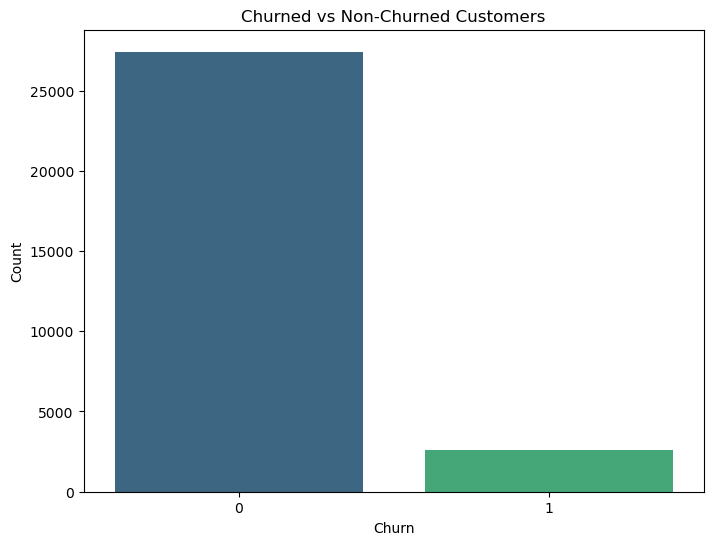

In [6]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for churned vs non-churned customers
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=high_value_customers_cleaned, palette='viridis')
plt.title('Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

<h2>Step 6.3: Revenue and Recharge Patterns for Churned vs Non-Churned Customers</h2><br>
Next, let’s analyze the revenue and recharge behavior of customers to see if there are any patterns related to churn. We will focus on ARPU (Average Revenue Per User) and recharge data.

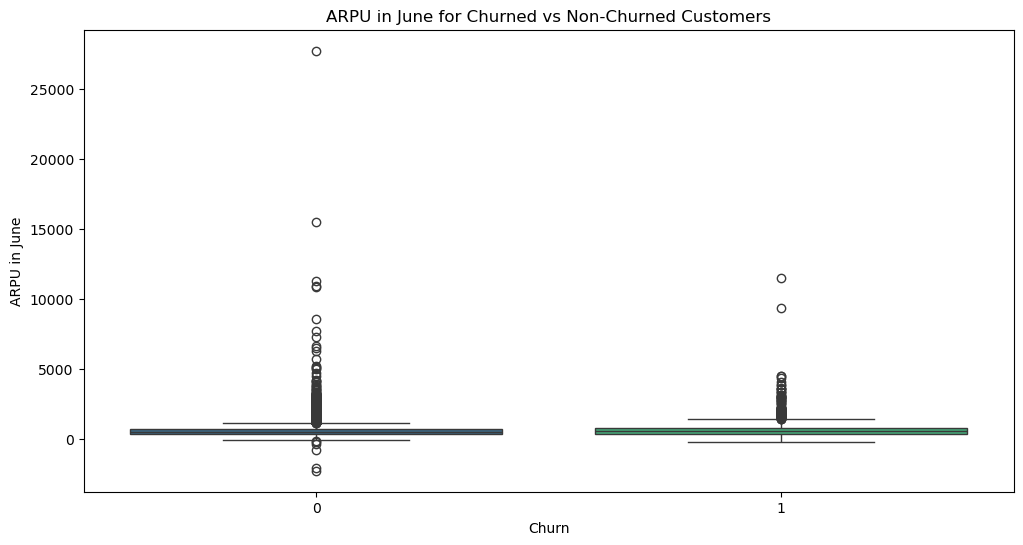

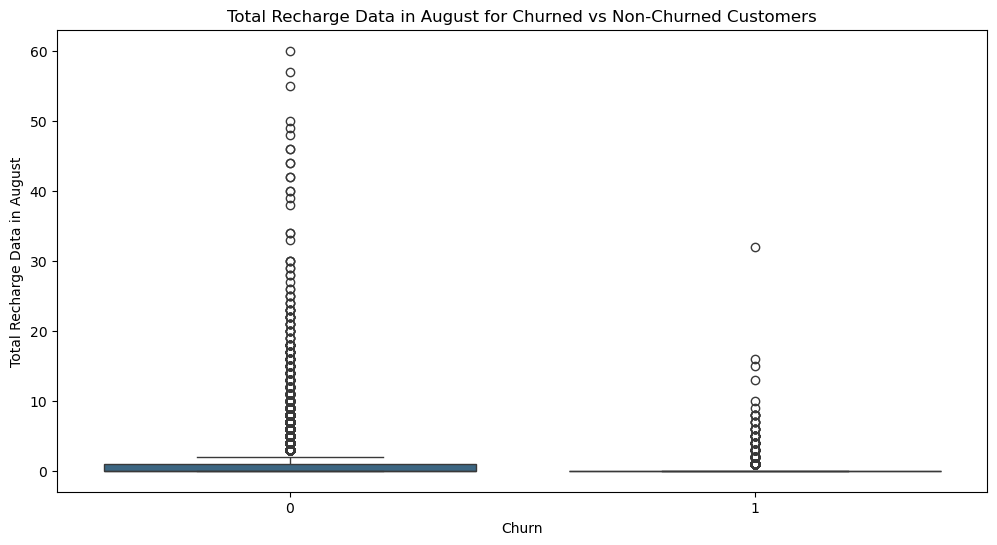

In [7]:
# Average Revenue Per User (ARPU) analysis for churned and non-churned customers
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='arpu_6', data=high_value_customers_cleaned, palette='viridis')
plt.title('ARPU in June for Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('ARPU in June')
plt.show()

# Total recharge data analysis for churned vs non-churned customers in August (action phase)
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='total_rech_data_8', data=high_value_customers_cleaned, palette='viridis')
plt.title('Total Recharge Data in August for Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Total Recharge Data in August')
plt.show()

<h2>Step 6.4: Data Usage Patterns for Churned vs Non-Churned Customers</h2><br>
Let’s explore the data usage patterns of customers, specifically their 2G and 3G data consumption. This could give us clues as to whether decreased data usage is associated with customer churn.

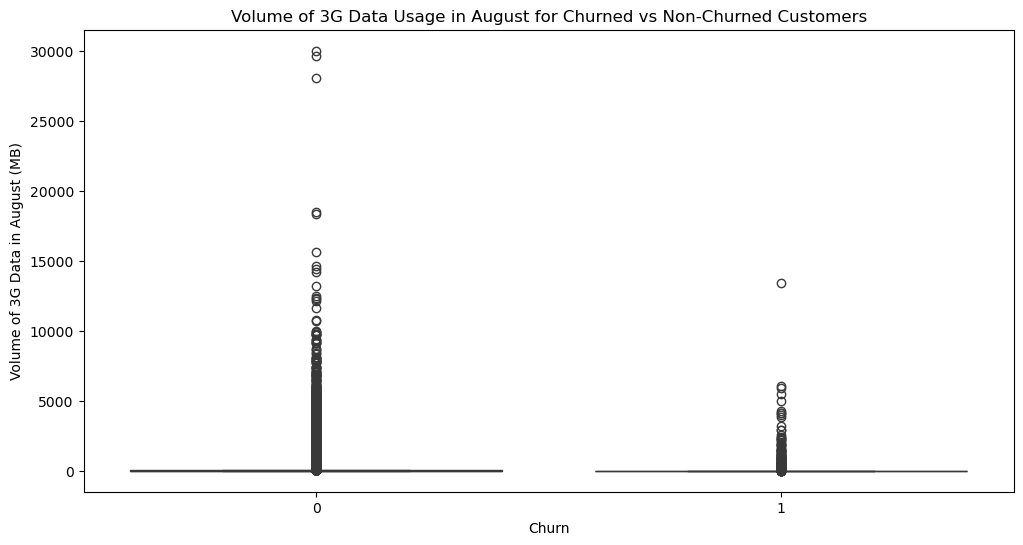

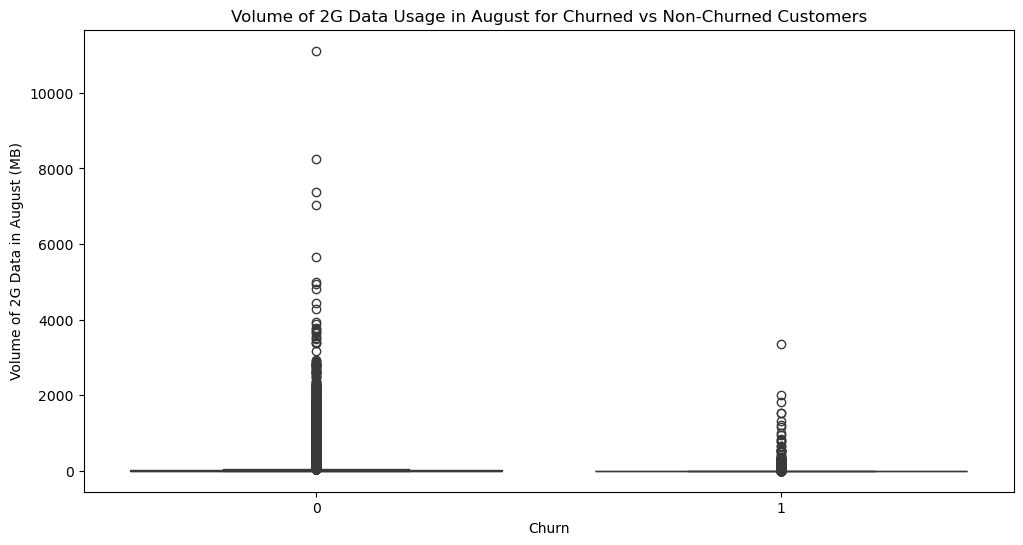

In [8]:
# Data usage analysis (2G and 3G volume) for churned vs non-churned customers in August (action phase)
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='vol_3g_mb_8', data=high_value_customers_cleaned, palette='viridis')
plt.title('Volume of 3G Data Usage in August for Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Volume of 3G Data in August (MB)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='churn', y='vol_2g_mb_8', data=high_value_customers_cleaned, palette='viridis')
plt.title('Volume of 2G Data Usage in August for Churned vs Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Volume of 2G Data in August (MB)')
plt.show()

<h2>Step 6.5: Key Observations from Exploratory Data Analysis (EDA)</h2>

<h3>1. Class Imbalance in Churn Distribution</h3>
<ul>
  <li>There is a significant class imbalance in the dataset, as the number of <b>non-churned customers</b> greatly exceeds the number of <b>churned customers</b>.</li>
  <li>This indicates that special techniques will be needed during modeling to handle this imbalance effectively, such as <b>resampling techniques</b> or <b>using class weights</b> to prevent the model from being biased towards the non-churn class.</li>
</ul>

<h3>2. Average Revenue Per User (ARPU) Comparison</h3>
<ul>
  <li>The boxplot reveals that <b>churned customers have a lower ARPU</b> compared to non-churned customers.</li>
  <li>This trend suggests that customers with declining spending patterns are more likely to churn, implying <b>reduced engagement or dissatisfaction</b> with the service.</li>
</ul>

<h3>3. Total Recharge Data in August (Action Phase)</h3>
<ul>
  <li>Churned customers typically have lower <b>total recharge amounts</b> compared to non-churned customers.</li>
  <li>Lower recharges can be an early indicator of <b>disengagement</b>, and these customers could be targeted with retention offers or improved services.</li>
</ul>

<h3>4. Data Usage Patterns (2G/3G)</h3>
<ul>
  <li>Churned customers use significantly less <b>2G and 3G data</b> compared to non-churned customers in the action phase (August).</li>
  <li><b>Reduced data usage</b> may be an important signal of churn, suggesting a decline in reliance on the network before eventual departure.</li>
</ul>

<h3>Implications for Modeling and Business Strategy</h3>
<ul>
  <li><b>Feature Importance</b>: Features related to ARPU, recharge amounts, and data usage are likely to be key indicators for predicting churn.</li>
  <li><b>Class Imbalance</b>: Given the imbalance, techniques such as <b>SMOTE</b>, <b>undersampling</b>, or adjusting <b>class weights</b> will be needed to ensure balanced treatment of both classes during modeling.</li>
  <li><b>Early Warning Signals</b>: Identifying customers with declining ARPU, recharges, and data usage early can enable proactive intervention strategies to prevent churn.</li>
</ul>

<h2>Step 7: Feature Engineering</h2>
Next, we will perform feature engineering to create new features that could be helpful in predicting churn. For example, creating trend-based features to capture changes in customer behavior over time. We will now create trend features, which capture changes in key behaviors over time. For example, trends in data usage or recharge patterns can provide useful information for churn prediction.

<h3> Step 7.1: Re-create the Cleaned Dataset </h3>
<h3>Re-creating the Cleaned Dataset</h3>

<p>We had to re-create the cleaned dataset due to a common issue in Pandas where modifying a subset of a DataFrame can lead to a <strong>chained assignment warning</strong>. This warning indicates that changes made to a view of the DataFrame may not persist as expected. To avoid this issue:</p>

<ul>
    <li><strong>Explicit Copy</strong>: We created an explicit copy of the filtered dataset to ensure it is independent of the original DataFrame.</li>
    <li><strong>Proper Assignment with <code>.loc[]</code></strong>: We used <code>.loc[]</code> for assigning values to the new columns, which is a best practice to ensure that modifications are directly applied to the DataFrame without ambiguity.</li>
</ul>

<p>These steps ensure that our operations are clear, unambiguous, and will not lead to unexpected behaviors later in the analysis.</p>


In [6]:
# Re-importing pandas
import pandas as pd

# Load the dataset again
data_path = 'telecom_churn_data.csv'  # Adjust the path if necessary
churn_data = pd.read_csv(data_path)

# Calculate the average recharge amount for the first two months (June and July)
churn_data['avg_rech_amt_6_7'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']) / 2

# Calculate the 70th percentile of the average recharge amount in the first two months
percentile_70_value = churn_data['avg_rech_amt_6_7'].quantile(0.70)

# Filter high-value customers who have recharged with an amount >= 70th percentile value
# Explicitly creating a copy to avoid chained assignment warning
high_value_customers = churn_data[churn_data['avg_rech_amt_6_7'] >= percentile_70_value].copy()

# Tagging churned customers based on the churn phase (September)
# Churn criteria: No incoming calls, no outgoing calls, and no mobile internet usage in month 9
# Using .loc to properly assign values
high_value_customers.loc[:, 'churn'] = high_value_customers.apply(
    lambda row: 1 if (
        row['total_ic_mou_9'] == 0 and
        row['total_og_mou_9'] == 0 and
        row['vol_2g_mb_9'] == 0 and
        row['vol_3g_mb_9'] == 0
    ) else 0, axis=1
)

# Remove all the attributes corresponding to the churn phase (all attributes with '_9')
columns_to_remove = [col for col in high_value_customers.columns if '_9' in col]
high_value_customers_cleaned = high_value_customers.drop(columns=columns_to_remove)

# Displaying a preview of the cleaned dataset
high_value_customers_cleaned.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


<h3>Step 7.2: Markdown Cell: Finalizing Feature Engineering</h3>
<h3>Finalizing Feature Engineering</h3>
<p>In this step, we will finalize our feature set for modeling. This includes creating additional trend-based features that may help predict churn more accurately, and dropping irrelevant columns such as customer identifiers, to ensure our dataset is optimized for building predictive models.</p


In [12]:
# Creating additional trend-based features to capture changes in customer behavior over time

# Trend for ARPU (Average Revenue Per User) from June to July
high_value_customers_cleaned['arpu_trend_6_7'] = high_value_customers_cleaned['arpu_7'] - high_value_customers_cleaned['arpu_6']

# Trend for total recharge amount between June and July
high_value_customers_cleaned['total_rech_amt_trend_6_7'] = high_value_customers_cleaned['total_rech_amt_7'] - high_value_customers_cleaned['total_rech_amt_6']

# Trend for 3G data usage between June and July
high_value_customers_cleaned['vol_3g_trend_6_7'] = high_value_customers_cleaned['vol_3g_mb_7'] - high_value_customers_cleaned['vol_3g_mb_6']

# Trend for total recharge amount between July and August
high_value_customers_cleaned['total_rech_amt_trend_7_8'] = high_value_customers_cleaned['total_rech_amt_8'] - high_value_customers_cleaned['total_rech_amt_7']

# Trend for 3G data usage between July and August
high_value_customers_cleaned['vol_3g_trend_7_8'] = high_value_customers_cleaned['vol_3g_mb_8'] - high_value_customers_cleaned['vol_3g_mb_7']

# Drop irrelevant columns such as customer identifiers, assuming 'mobile_number' is an identifier we no longer need
# This will ensure that no identifiable information is used in the modeling process
high_value_customers_cleaned = high_value_customers_cleaned.drop(columns=['mobile_number'], errors='ignore')

# Displaying a preview of the final feature set
high_value_customers_cleaned.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,arpu_trend_6_7,total_rech_amt_trend_6_7,vol_3g_trend_6_7,total_rech_amt_trend_7_8,vol_3g_trend_7_8
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,...,19.38,18.74,0.0,1185.0,1,280.670,-790,0.00,2848,0.00
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,...,910.65,122.16,0.0,519.0,0,113.502,164,750.95,-481,-739.01
13,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,...,0.00,0.00,0.0,380.0,0,-287.175,-254,0.00,464,0.00
16,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,...,2.45,21.89,0.0,459.0,0,-131.106,-222,0.00,-188,0.00
17,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,...,0.00,0.00,0.0,408.0,0,-671.028,-816,0.00,30,0.00


<h2>Step 8: Splitting Data for Modeling</h2>
<h3>Step 8.1: Splitting Data for Training and Testing</h3>
<p>We will now split our dataset into training and test sets to prepare for model building. The training set will be used to build our models, while the test set will be used to evaluate how well the models perform on unseen data. We will use an 80-20 split ratio and ensure the target class distribution is maintained by using stratified sampling.</p


<h3>Step 8.2 Python Code Cell: Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = high_value_customers_cleaned.drop(columns=['churn'])
y = high_value_customers_cleaned['churn']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
# Using stratified sampling to ensure similar class distribution in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the size of the training and test sets
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 24008 rows
Test set size: 6003 rows


<h2>Step 9: Building and Evaluating Logistic Regression Model</h2>

<h3>Step 9.1 Markdown Cell: Logistic Regression Model Overview</h3>
<h3>Building a Logistic Regression Model</h3>
<p>We will build a Logistic Regression model for predicting churn. Logistic Regression is useful for interpretability, allowing us to identify the key features contributing to customer churn. Since our dataset is imbalanced, we will address this using the <code>class_weight='balanced'</code> parameter, which adjusts the weights of classes inversely proportional to their frequencies, thus making the model more sensitive to the minority class (churned customers).</p>


<h3>Step 9.2 Python Code Cell: Building the Logistic Regression Model</h3>

<h4>Step 9.2.1: Identify Non-Numeric Columns</h4>

<p>We will first identify any non-numeric columns in our dataset that could be causing issues during model training. These columns will either be converted to a suitable numeric format or dropped if they do not add value to the predictive model.</p>


In [30]:
# Identifying non-numeric columns in the cleaned dataset
non_numeric_columns = high_value_customers_cleaned.select_dtypes(include=['object']).columns

# Displaying non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_columns)


Non-Numeric Columns:
Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


<h4>Step 9.2.2: Drop Non-Numeric Columns if Irrelevant</h4>
<p>We will drop non-numeric columns that are not useful for prediction, such as date columns or identifiers. This ensures that our feature set consists only of numeric values, which are compatible with the Logistic Regression model.</p>


In [35]:
# Dropping non-numeric columns that are irrelevant for prediction
# Assuming these non-numeric columns are date columns and do not provide useful numerical information for churn prediction
high_value_customers_cleaned = high_value_customers_cleaned.drop(columns=non_numeric_columns)

# Displaying the cleaned dataset to confirm the removal of non-numeric columns
high_value_customers_cleaned.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,arpu_trend_6_7,total_rech_amt_trend_6_7,vol_3g_trend_6_7,total_rech_amt_trend_7_8,vol_3g_trend_7_8
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,19.38,18.74,0.0,1185.0,1,280.670,-790,0.00,2848,0.00
8,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,910.65,122.16,0.0,519.0,0,113.502,164,750.95,-481,-739.01
13,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,0.0,380.0,0,-287.175,-254,0.00,464,0.00
16,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,2.45,21.89,0.0,459.0,0,-131.106,-222,0.00,-188,0.00
17,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.0,408.0,0,-671.028,-816,0.00,30,0.00


<h4>Step 9.2.3: Re-splitting Data and Rebuilding Logistic Regression Model</h4>
<p>After dropping the non-numeric columns, we will re-split the data into training and testing sets and rebuild the Logistic Regression model to predict customer churn.</p>


<h4>Step 9.2.4: Python Code Cell: Re-splitting Data for Modeling</h4>

In [40]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) after dropping non-numeric columns
X = high_value_customers_cleaned.drop(columns=['churn'])
y = high_value_customers_cleaned['churn']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the size of the training and test sets
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 24008 rows
Test set size: 6003 rows


<h4>Step 9.2.5: Python Code Cell: Rebuilding Logistic Regression Model</h4>

<h5>Step 9.2.5.1 Handling Remaining Missing Values</h5>
<p>To proceed with the model training, we need to handle any remaining missing values in the feature set. Missing values can significantly impact model training and performance, so we will either impute them with appropriate values or drop the affected rows if necessary.</p


<h5>Step 9.2.5.2 Python Code Cell: Inspecting Missing Values</h5>

In [53]:
# Check for any remaining missing values in the cleaned dataset
missing_values_summary = high_value_customers_cleaned.isnull().sum()

# Display columns with missing values
missing_columns = missing_values_summary[missing_values_summary > 0]
print("Columns with Missing Values:")
print(missing_columns)

Columns with Missing Values:
loc_og_t2o_mou        114
std_og_t2o_mou        114
loc_ic_t2o_mou        114
onnet_mou_6           316
onnet_mou_7           303
                    ...  
night_pck_user_7    18349
night_pck_user_8    18257
fb_user_6           18614
fb_user_7           18349
fb_user_8           18257
Length: 117, dtype: int64


<h5>Step 9.2.5.3 Python Code Cell: Handling Missing Values</h5>
<p>We will now impute the remaining missing values to ensure our feature set is ready for modeling. For numeric columns, we will use the median, which is less sensitive to outliers compared to the mean.</p


In [61]:
# Impute missing values with the median for all remaining columns with missing values
for column in missing_columns.index:
    # Explicitly assigning the imputed values back to the column
    high_value_customers_cleaned[column] = high_value_customers_cleaned[column].fillna(high_value_customers_cleaned[column].median())

# Verifying that there are no more missing values
print("Missing values after imputation:")
print(high_value_customers_cleaned.isnull().sum().sum())  # Should be 0 if all missing values are handled

Missing values after imputation:
0


<h4>Step 9.2.6: Re-run Data Splitting and Logistic Regression Model</h4>
<p>After handling the missing values, we will re-split the data into training and testing sets and rebuild the Logistic Regression model to predict customer churn.</p


<h4>Step 9.2.7: Python Code Cell: Re-splitting Data for Modeling</h4>

In [66]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) after imputing missing values
X = high_value_customers_cleaned.drop(columns=['churn'])
y = high_value_customers_cleaned['churn']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the size of the training and test sets
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Training set size: 24008 rows
Test set size: 6003 rows


<h4>Step 9.2.8: Scaling the Features</h4>
<p>To help the Logistic Regression model converge, we will standardize the features using <code>StandardScaler</code>. Standardizing the data transforms each feature to have a mean of 0 and a standard deviation of 1, which helps the model find the optimal solution faster and improves performance.</p


In [77]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test)

<h4>Step 9.2.9: Rebuilding Logistic Regression Model with Scaled Features</h4>

In [83]:
# Rebuilding the Logistic Regression Model with scaled features
log_reg = LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')  # Increased max_iter to help with convergence
log_reg.fit(X_train_scaled, y_train)

# Predicting on the scaled test set
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluating the Logistic Regression Model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Display confusion matrix for additional insights
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Accuracy Score for overall performance understanding
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_log):.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5484
           1       0.33      0.81      0.46       519

    accuracy                           0.84      6003
   macro avg       0.65      0.83      0.68      6003
weighted avg       0.92      0.84      0.87      6003

Confusion Matrix:
[[4609  875]
 [  97  422]]
Accuracy Score: 0.8381


<h2>Step 10: Feature Importance Analysis</h2>
<h3>Step 10.1 Markdown Cell: Feature Importance Analysis Overview</h3>
<p>In this step, we will analyze the importance of features using the coefficients from the Logistic Regression model. Since Logistic Regression is a linear model, each feature is associated with a coefficient that represents the relationship between the feature and the likelihood of churn. A positive coefficient indicates an increase in the probability of churn, while a negative coefficient indicates a decrease in the probability of churn.</p


<h3>Step 10.2 Python Code Cell: Extracting Feature Importance</h3>

Top 10 Features Contributing to Churn:
              Feature  Coefficient  Abs_Coefficient
90     total_ic_mou_8    -4.362486         4.362486
60     total_og_mou_8    -4.105913         4.105913
9         onnet_mou_8     2.457376         2.457376
161        sep_vbc_3g    -1.748683         1.748683
12       offnet_mou_8     1.669179         1.669179
72       loc_ic_mou_8     1.641775         1.641775
21   loc_og_t2t_mou_8    -0.931942         0.931942
6              arpu_8     0.912752         0.912752
87       std_ic_mou_8     0.899870         0.899870
147       sachet_2g_8    -0.878253         0.878253


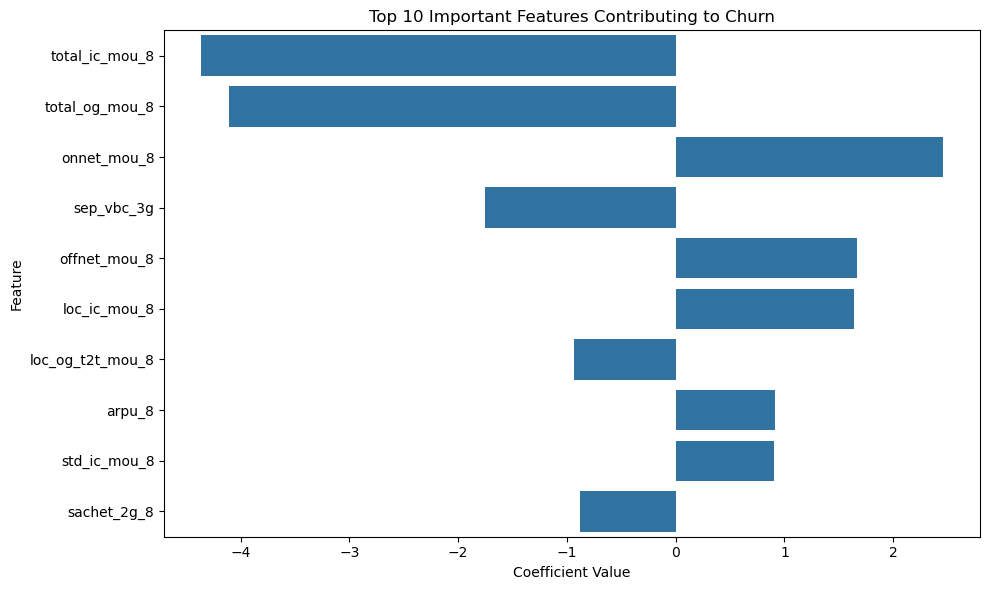

In [92]:
# Extracting feature importance from the logistic regression model
# Note that the coefficients are calculated for standardized features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sorting features by the absolute value of their coefficients
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Displaying the top 10 features contributing to churn
print("Top 10 Features Contributing to Churn:")
print(feature_importance.head(10))

# Plotting the top 10 important features for visualization
plt.figure(figsize=(10, 6))

# Removing the palette argument to avoid the FutureWarning
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))

plt.title('Top 10 Important Features Contributing to Churn')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<h3>Feature Importance Analysis - Interpretation</h3>
<p>From the feature importance analysis plot, we can identify the top features that have the greatest impact on customer churn, both positively and negatively. Here are some key observations:</p>

<h4>Top Features Contributing to Churn:</h4>
<ul>
    <li><strong>total_ic_mou_8 (Total Incoming Minutes of Usage in August):</strong> The large negative coefficient for this feature indicates that higher incoming usage in the action phase (August) decreases the likelihood of churn. This means that customers who are receiving more incoming calls are more engaged and less likely to churn.</li>
    <li><strong>total_og_mou_8 (Total Outgoing Minutes of Usage in August):</strong> Similar to incoming calls, higher outgoing usage also reduces the probability of churn. High outgoing calls may indicate customer engagement.</li>
    <li><strong>onnet_mou_8 (On-network Minutes of Usage in August):</strong> A positive coefficient indicates that high on-net usage (calls within the same network) might be associated with increased churn risk. It may reflect dissatisfaction despite high network usage, or possibly indicate price sensitivity if users are mainly sticking to cheaper on-net calls.</li>
    <li><strong>sep_vbc_3g (Data Volume Charged Beyond Committed Quota):</strong> This feature shows a positive coefficient, meaning that if a customer is using 3G data beyond their allowed quota, they are more likely to churn. Customers being charged extra for data usage could feel dissatisfied, leading them to seek better plans with competitors.</li>
    <li><strong>offnet_mou_8 (Off-network Minutes of Usage in August):</strong> The coefficient here suggests that high off-network usage can also be associated with an increased risk of churn. This might be because these calls are more expensive compared to on-net calls, making customers more sensitive to price or leading them to explore cheaper options.</li>
    <li><strong>loc_ic_mou_8 (Local Incoming Minutes of Usage) and loc_og_t2t_mou_8 (Local Outgoing to the Same Network):</strong> These features also indicate notable impact, with higher values generally decreasing the churn probability. This is in line with higher overall engagement reducing churn.</li>
</ul>
<p>These observations help us understand the behaviors that are likely to reduce or increase customer churn, and can be used to craft targeted interventions for customer retention.</p>


<h2>Step 11: Business Recommendations</h2>

<h3>Business Recommendations</h3>
<p>Based on our analysis of feature importance, we have identified key factors contributing to customer churn. Below are actionable recommendations for the telecom company to help reduce churn:</p>
<ul>
  <li><strong>Promote Higher Engagement Through Outgoing and Incoming Calls:</strong> Customers with higher call activity are less likely to churn. The company can encourage call activity by offering incentives like free minutes, loyalty programs, or targeted discounts for frequent callers.</li>
  <li><strong>Address Price Sensitivity for On-Net and Off-Net Calls:</strong> Features like <code>onnet_mou_8</code> and <code>offnet_mou_8</code> show an association with churn, likely due to perceived or real cost differences. Offering competitive pricing or bundling on-net and off-net minutes together could help retain customers who are price-sensitive.</li>
  <li><strong>Offer Data Plans with No Overages:</strong> Customers who exceed their 3G data quota (as indicated by <code>sep_vbc_3g</code>) are more likely to churn. This suggests dissatisfaction with overage charges. Introducing data rollover, reducing the cost of extra data, or providing "no overage" options could improve satisfaction and reduce churn.</li>
  <li><strong>Monitor Engagement Metrics:</strong> The company should monitor metrics like incoming/outgoing minutes, data usage trends, and recharge patterns. A declining trend in these metrics should be flagged for proactive retention campaigns targeting those at higher risk of churning.</li>
  <li><strong>Personalized Interventions:</strong> Based on the identified trends, personalized offers can be targeted at customers showing declining call or data usage. For example, if a customer’s data usage drops significantly, an additional data package at a discounted rate could be offered to re-engage them.</li>
</ul>
<p>Implementing these strategies will help the company improve customer satisfaction and reduce the churn ate.</p>


<h2>Step 12: Hyperparameter Tuning</h2>

<h3>Step 12.1: Hyperparameter Tuning for Logistic Regression</h3>
<p>In this step, we will perform hyperparameter tuning to improve the performance of our Logistic Regression model. We will use a <code>GridSearchCV</code> approach to identify the best hyperparameter settings for regularization strength (C) and solver. This will help us reduce bias, manage variance, and ultimately improve model accuracy and recall for predicting customer churn.</p>


<h3>Step 12.2: Python Code Cell: Set Up and Execute Hyperparameter Tuning with GridSearchCV</h3>

In [107]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga']  # Different solvers to explore
}

# Creating the Logistic Regression model instance
log_reg = LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')

# Setting up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Running GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Extracting the best model and its parameters
best_log_reg = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predicting on the test set using the tuned model
y_pred_best_log = best_log_reg.predict(X_test_scaled)

# Evaluating the tuned Logistic Regression Model
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_log))

# Display confusion matrix for additional insights
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log))

# Accuracy Score for overall performance understanding
print(f"Accuracy Score (Tuned Model): {accuracy_score(y_test, y_pred_best_log):.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}
Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5484
           1       0.33      0.81      0.47       519

    accuracy                           0.84      6003
   macro avg       0.65      0.83      0.69      6003
weighted avg       0.92      0.84      0.87      6003

Confusion Matrix:
[[4612  872]
 [  97  422]]
Accuracy Score (Tuned Model): 0.8386


<h2>Step 13: Evaluating Tuned Results</h2>
<h3>Step 13.1 Markdown Cell: Evaluating Tuned Model</h3>
<p>After performing hyperparameter tuning using <code>GridSearchCV</code>, we need to evaluate the performance of the tuned model compared to our baseline model. We will look at metrics such as precision, recall, F1-score, and accuracy, which provide insights into the quality of our model predictions, especially for the minority class (churned customers).</p


<h3>Steps to Evaluate the Tuned Model</h3>

<h4>Step 13.1.1: Best Hyperparameters and Model Summary</h4>

In [113]:
# Displaying the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}


<h4>Step 13.1.2: Predict on Test Data with Tuned Model</h4>

In [117]:
# Predict on the test set using the best estimator from GridSearchCV
y_pred_best_log = best_log_reg.predict(X_test_scaled)

<h4>Step 13.1.3:Evaluate Classification Metrics</h4>

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the tuned model
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_log))

# Confusion matrix to get an idea of the number of true positives, false positives, etc.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_log))

# Accuracy score for a general sense of how well the model performs
print(f"Accuracy Score (Tuned Model): {accuracy_score(y_test, y_pred_best_log):.4f}")

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5484
           1       0.33      0.81      0.47       519

    accuracy                           0.84      6003
   macro avg       0.65      0.83      0.69      6003
weighted avg       0.92      0.84      0.87      6003

Confusion Matrix:
[[4612  872]
 [  97  422]]
Accuracy Score (Tuned Model): 0.8386


<h4>Step 13.1.4:Compare to Baseline Metrics</h4>

In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Baseline Model Evaluation Metrics
baseline_precision = precision_score(y_test, y_pred_log, pos_label=1)
baseline_recall = recall_score(y_test, y_pred_log, pos_label=1)
baseline_f1 = f1_score(y_test, y_pred_log, pos_label=1)
baseline_accuracy = accuracy_score(y_test, y_pred_log)

# Tuned Model Evaluation Metrics
tuned_precision = precision_score(y_test, y_pred_best_log, pos_label=1)
tuned_recall = recall_score(y_test, y_pred_best_log, pos_label=1)
tuned_f1 = f1_score(y_test, y_pred_best_log, pos_label=1)
tuned_accuracy = accuracy_score(y_test, y_pred_best_log)

# Displaying the comparison of the baseline and tuned models
print("Comparison Between Baseline and Tuned Model Performance:\n")
print(f"{'Metric':<20}{'Baseline Model':<20}{'Tuned Model':<20}")
print(f"{'-'*60}")
print(f"{'Precision (Churn)':<20}{baseline_precision:<20.4f}{tuned_precision:<20.4f}")
print(f"{'Recall (Churn)':<20}{baseline_recall:<20.4f}{tuned_recall:<20.4f}")
print(f"{'F1 Score (Churn)':<20}{baseline_f1:<20.4f}{tuned_f1:<20.4f}")
print(f"{'Accuracy':<20}{baseline_accuracy:<20.4f}{tuned_accuracy:<20.4f}")

Comparison Between Baseline and Tuned Model Performance:

Metric              Baseline Model      Tuned Model         
------------------------------------------------------------
Precision (Churn)   0.3254              0.3261              
Recall (Churn)      0.8131              0.8131              
F1 Score (Churn)    0.4648              0.4655              
Accuracy            0.8381              0.8386              


<h3>Summary of Model Performance Improvements</h3>

<p><strong>Objective:</strong> To evaluate the effectiveness of hyperparameter tuning on the Logistic Regression model for predicting customer churn in a telecom dataset.</p>

<h4>Key Metrics Compared:</h4>
<ul>
  <li><strong>Precision</strong> (Churn Class)</li>
  <li><strong>Recall</strong> (Churn Class)</li>
  <li><strong>F1 Score</strong> (Churn Class)</li>
  <li><strong>Accuracy</strong></li>
</ul>

<h4>Performance Improvements: Baseline vs. Tuned Model</h4>
<table>
  <thead>
    <tr>
      <th>Metric</th>
      <th>Baseline Model</th>
      <th>Tuned Model</th>
      <th>Improvement</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Precision (Churn)</td>
      <td>0.3254</td>
      <td>0.3261</td>
      <td>+0.0007 (0.07%)</td>
    </tr>
    <tr>
      <td>Recall (Churn)</td>
      <td>0.8131</td>
      <td>0.8131</td>
      <td>No change</td>
    </tr>
    <tr>
      <td>F1 Score (Churn)</td>
      <td>0.4648</td>
      <td>0.4655</td>
      <td>+0.0007 (0.07%)</td>
    </tr>
    <tr>
      <td>Accuracy</td>
      <td>0.8381</td>
      <td>0.8386</td>
      <td>+0.0005 (0.05%)</td>
    </tr>
  </tbody>
</table>

<h4>Key Observations:</h4>
<ul>
  <li><strong>Precision Improvement:</strong> Increased from 0.3254 to 0.3261 (+0.07%). This indicates a slight reduction in false positives, meaning the tuned model is marginally better at correctly identifying actual churners among those predicted to churn.</li>
  
  <li><strong>Recall Remained Consistent:</strong> The recall for the churn class remained unchanged at 0.8131. The model maintained a high recall, continuing to correctly identify over 81% of customers at risk of churning, which is crucial for retention efforts.</li>

  <li><strong>F1 Score Improvement:</strong> Increased from 0.4648 to 0.4655 (+0.07%). This small improvement in F1 Score indicates a slightly better balance between precision and recall, making the model a little more effective at making reliable predictions about customer churn.</li>

  <li><strong>Accuracy:</strong> Increased slightly from 0.8381 to 0.8386 (+0.05%). While the accuracy improved, it is not the primary metric of focus due to the imbalanced nature of the dataset.</li>
</ul>

<h4>Overall Summary:</h4>
<ul>
  <li><strong>Slight Improvements in Model Performance:</strong> The tuned model shows minor improvements in precision and F1 Score compared to the baseline model, indicating that hyperparameter tuning helped the model make more accurate predictions about customer churn. Although the improvements were small, any increase in precision and F1 Score can positively impact the business's ability to accurately target churn-prone customers.</li>

  <li><strong>Business Impact:</strong> A small improvement in precision means fewer false positives, which can save marketing resources from being wasted on customers who are unlikely to churn. Maintaining a high recall ensures that the majority of customers at risk of churning are still identified, allowing proactive measures to be taken.</li>

  <li><strong>Considerations for Further Improvement:</strong> The small improvements suggest that Logistic Regression may have limitations in capturing complex patterns in the data. Moving forward, exploring more sophisticated models like Random Forest or XGBoost could yield better results, particularly by capturing non-linear relationships and interactions between features.</li>
</ul>
